In [1]:
import sqlite3
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
from datetime import datetime

/Users/necatifurkancolak/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
desktop_path = os.path.expanduser("~/Desktop/hedging-against-turkish-inflation/notebooks/database_final.db")

if not os.path.isfile(desktop_path):
    raise FileNotFoundError(f"Database file not found at {desktop_path}")

conn = sqlite3.connect(desktop_path)

tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in the database:")
print(tables)

Tables in the database:
      name
0  STOCKEX
1      BTC
2     GOLD
3     BOND
4      HPI
5      INF


## VISUALS FOR STOCK EXCHANGE:

In [3]:
df_stock = pd.read_sql_query("SELECT * from STOCKEX", conn)
# blue

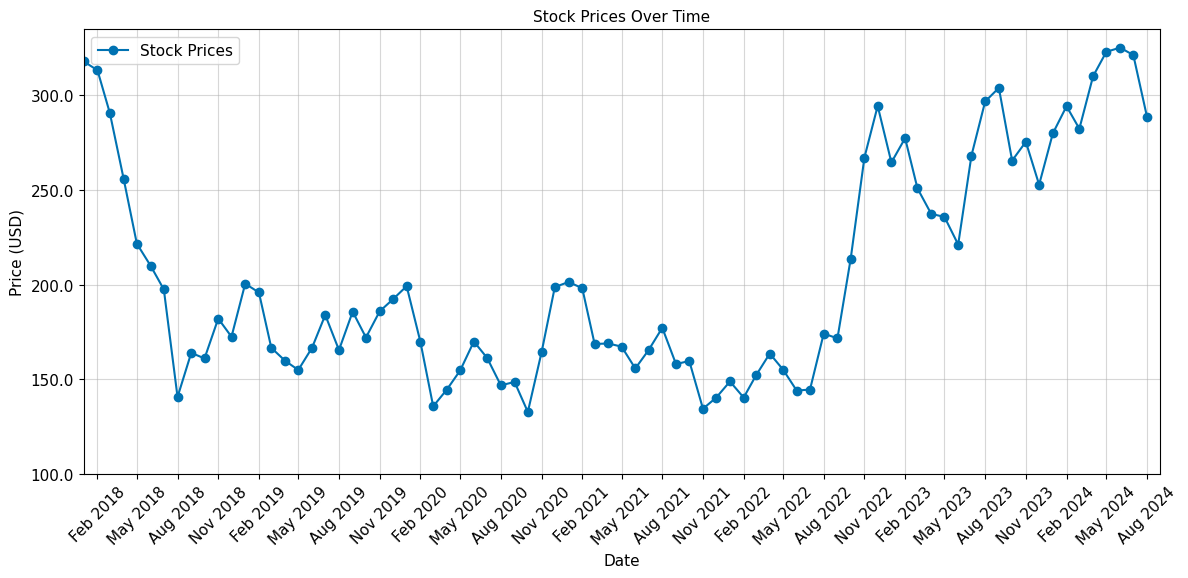

In [4]:
df_stock['Date'] = pd.to_datetime(df_stock['Date'])
df_stock['Price_Stock_Ex'] = df_stock['Price_Stock_Ex'].replace('[\$,]', '', regex=True)
df_stock['Price_Stock_Ex'] = pd.to_numeric(df_stock['Price_Stock_Ex'], errors='coerce')
df_stock = df_stock.dropna(subset=['Price_Stock_Ex'])
start_date = '2018-01-01'
end_date = '2024-08-31'
df_stock = df_stock[(df_stock['Date'] >= start_date) & (df_stock['Date'] <= end_date)]
df_stock = df_stock.sort_values(by='Date')
min_price = df_stock['Price_Stock_Ex'].min()
max_price = df_stock['Price_Stock_Ex'].max()
y_tick_step = 50
y_ticks = list(range(
    int(min_price // y_tick_step) * y_tick_step,
    int(max_price // y_tick_step) * y_tick_step + y_tick_step,
    y_tick_step
))
plt.figure(figsize=(12, 6))
plt.plot(
    df_stock['Date'],
    df_stock['Price_Stock_Ex'],
    marker='o',
    linestyle='-',
    color='#0072B2',
    label='Stock Prices'
)
plt.title('Stock Prices Over Time', fontsize=11)
plt.xlabel('Date', fontsize=11)
plt.ylabel('Price (USD)', fontsize=11)
plt.yticks(y_ticks, fontsize=11)
plt.xticks(rotation=45, fontsize=11)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
locator = mdates.MonthLocator(interval=3)
formatter = mdates.DateFormatter('%b %Y')
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.xlim([datetime(2018, 1, 1), datetime(2024, 8, 31)])
plt.grid(True, alpha=0.5)
plt.legend(fontsize=11, loc='upper left')
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

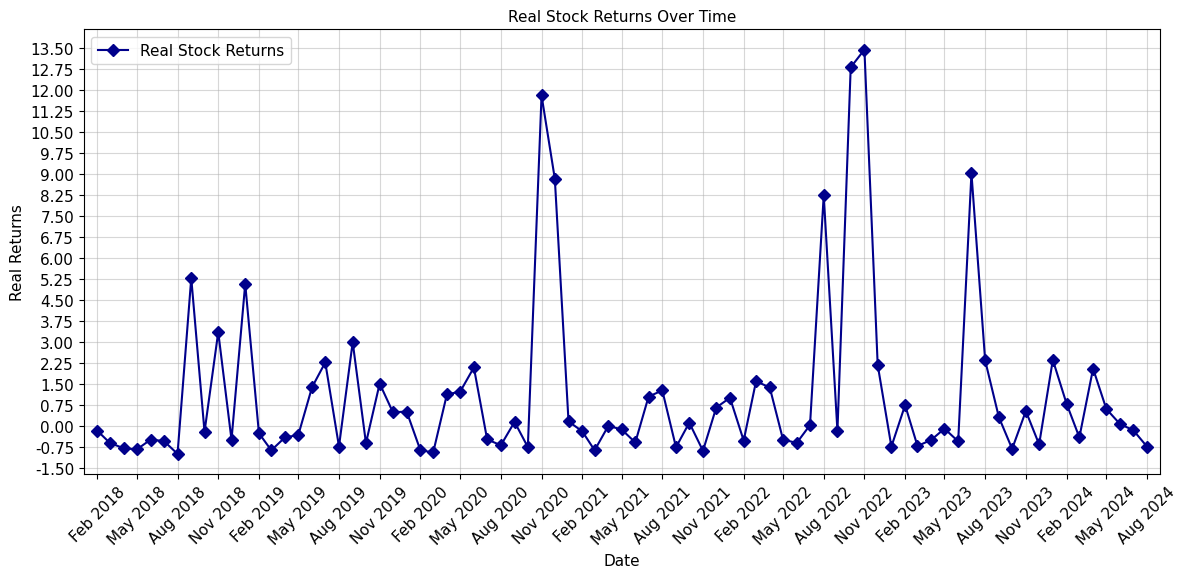

In [5]:
y_tick_step = 0.75  # Adjust step as needed
min_price = df_stock['real_return_stockex'].min()
max_price = df_stock['real_return_stockex'].max()

import numpy as np
y_ticks = np.arange(
    np.floor(min_price / y_tick_step) * y_tick_step,
    np.ceil(max_price / y_tick_step) * y_tick_step + y_tick_step,
    y_tick_step
)

plt.figure(figsize=(12, 6))
plt.plot(
    df_stock['Date'],
    df_stock['real_return_stockex'],
    marker='D',
    color='darkblue', 
    label='Real Stock Returns'
)
plt.title('Real Stock Returns Over Time', fontsize=11)
plt.xlabel('Date', fontsize=11)
plt.ylabel('Real Returns', fontsize=11)
plt.yticks(y_ticks, fontsize=11)
plt.xticks(rotation=45, fontsize=11)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
locator = mdates.MonthLocator(interval=3)
formatter = mdates.DateFormatter('%b %Y')
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.xlim([datetime(2018, 1, 1), datetime(2024, 8, 31)])
plt.grid(True, alpha=0.5)
plt.legend(fontsize=11, loc='upper left')
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

## VISUALS FOR GOLD:

In [6]:
df_gold = pd.read_sql_query("SELECT * from GOLD", conn)
df_gold.head()
# orange

,Date,Price_Gold,gold_return_mo,gold_return_pa,real_return_gold
0,2024-09,2634.58,0.052405,0.845842,0.836823
1,2024-08,2503.39,0.022794,0.310560,0.303837
2,2024-07,2447.6,0.051939,0.836068,0.825075
3,2024-06,2326.75,-0.000249,-0.002986,-0.010056
4,2024-05,2327.33,0.017968,0.238258,0.229042


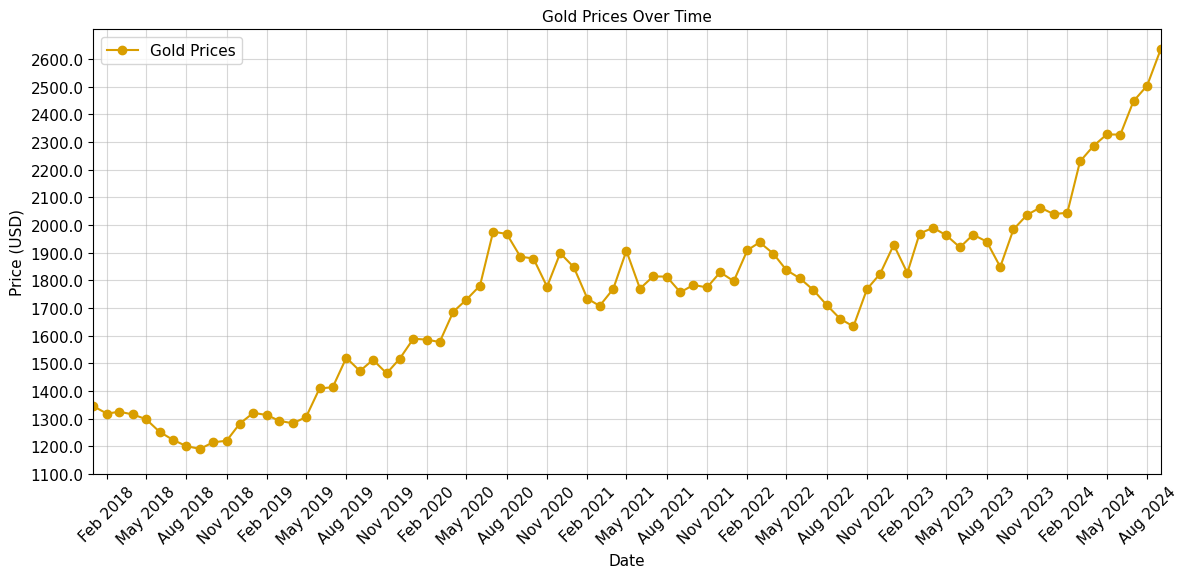

In [7]:
df_gold['Date'] = pd.to_datetime(df_gold['Date'], format='%Y-%m')
df_gold['Price_Gold'] = pd.to_numeric(df_gold['Price_Gold'], errors='coerce')  # Convert to numeric

df_gold = df_gold.sort_values(by='Date')

min_price = df_gold['Price_Gold'].min()
max_price = df_gold['Price_Gold'].max()
y_tick_step = 100
y_ticks = list(range(
    int(min_price // y_tick_step) * y_tick_step,
    int(max_price // y_tick_step) * y_tick_step + y_tick_step,
    y_tick_step
))

plt.figure(figsize=(12, 6))
plt.plot(
    df_gold['Date'],
    df_gold['Price_Gold'],
    marker='o',
    linestyle='-',
    color='#D99E00',  
    label='Gold Prices'
)
plt.title('Gold Prices Over Time', fontsize=11)
plt.xlabel('Date', fontsize=11)
plt.ylabel('Price (USD)', fontsize=11)
plt.yticks(y_ticks, fontsize=11)
plt.xticks(rotation=45, fontsize=11)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

locator = mdates.MonthLocator(interval=3)
formatter = mdates.DateFormatter('%b %Y')
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.xlim([df_gold['Date'].min(), df_gold['Date'].max()])

plt.grid(True, alpha=0.5)
plt.legend(fontsize=11, loc='upper left')
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

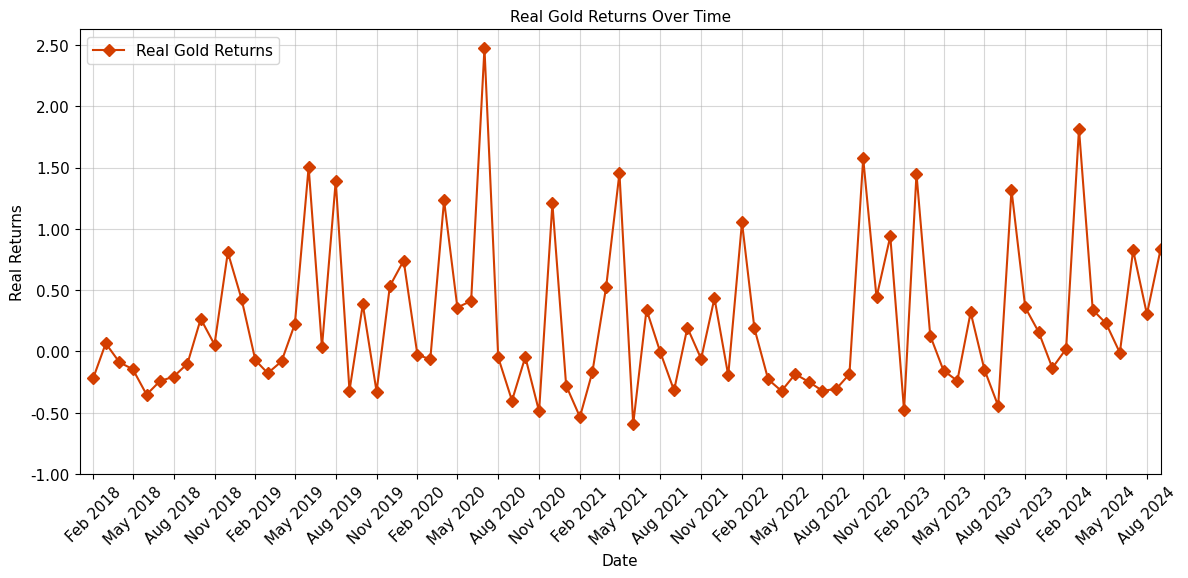

In [14]:
import numpy as np

locator = mdates.MonthLocator(interval=3)
formatter = mdates.DateFormatter('%b %Y')

plt.figure(figsize=(12, 6))
plt.plot(
    df_gold['Date'],
    df_gold['real_return_gold'],
    marker='D',
    color='#D33E00', 
    label='Real Gold Returns'
)

min_price = df_gold['real_return_gold'].min()
max_price = df_gold['real_return_gold'].max()
y_tick_step = 0.5
y_ticks = np.arange(
    np.floor(min_price / y_tick_step) * y_tick_step,
    np.ceil(max_price / y_tick_step) * y_tick_step + y_tick_step,
    y_tick_step
)

plt.title('Real Gold Returns Over Time', fontsize=11)
plt.xlabel('Date', fontsize=11)
plt.ylabel('Real Returns', fontsize=11)
plt.yticks(y_ticks, fontsize=11)
plt.xticks(rotation=45, fontsize=11)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.xlim([df_gold['Date'].min(), df_gold['Date'].max()])

plt.grid(True, alpha=0.5)
plt.legend(fontsize=11, loc='upper left')
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

## VISUALS FOR BOND:

In [15]:
df_gov_bond = pd.read_sql_query("SELECT * from BOND", conn)
df_gov_bond
#purple

,Date,Gov_Bond_Yield,bond_return_pa,real_return_bond
0,2024-08,26.715,0.26715,0.260959
1,2024-07,26.465,0.26465,0.258163
2,2024-06,26.745,0.26745,0.259862
3,2024-05,26.330,0.26330,0.254343
4,2024-04,26.300,0.26300,0.253601
5,2024-03,25.115,0.25115,0.241736
6,2024-02,25.200,0.25200,0.242654
7,2024-01,25.920,0.25920,0.250088
8,2023-12,23.610,0.23610,0.227449
9,2023-11,25.635,0.25635,0.247537


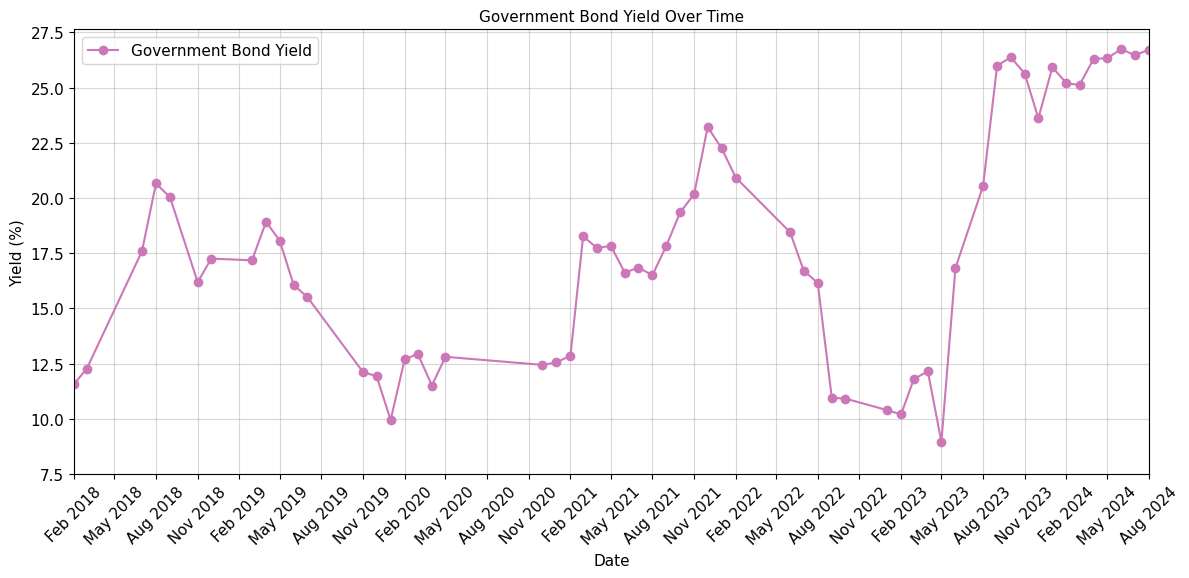

In [23]:
required_dates = pd.to_datetime(['2018-02', '2024-08'], format='%Y-%m')
df_gov_bond['Date'] = pd.to_datetime(df_gov_bond['Date'], format='%Y-%m', errors='coerce')

for date in required_dates:
    if date not in df_gov_bond['Date'].values:
        df_gov_bond = pd.concat(
            [df_gov_bond, pd.DataFrame({'Date': [date], 'Gov_Bond_Yield': [np.nan]})],
            ignore_index=True
        )

df_gov_bond = df_gov_bond.sort_values(by='Date').reset_index(drop=True)

min_price = df_gov_bond['Gov_Bond_Yield'].min()
max_price = df_gov_bond['Gov_Bond_Yield'].max()

y_tick_step = 2.5
y_ticks = np.arange(
    np.floor(min_price / y_tick_step) * y_tick_step,
    np.ceil(max_price / y_tick_step) * y_tick_step + y_tick_step,
    y_tick_step
)

plt.figure(figsize=(12, 6))
plt.plot(
    df_gov_bond['Date'],
    df_gov_bond['Gov_Bond_Yield'],
    marker='o',
    linestyle='-',
    color='#CC77B7',  # Purple
    label='Government Bond Yield'
)
plt.title('Government Bond Yield Over Time', fontsize=11)
plt.xlabel('Date', fontsize=11)
plt.ylabel('Yield (%)', fontsize=11)
plt.yticks(y_ticks, fontsize=11)
plt.xticks(rotation=45, fontsize=11)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

locator = mdates.MonthLocator(interval=3)
formatter = mdates.DateFormatter('%b %Y')
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.xlim([pd.Timestamp('2018-02'), pd.Timestamp('2024-08')])

plt.grid(True, alpha=0.5)
plt.legend(fontsize=11, loc='upper left')
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

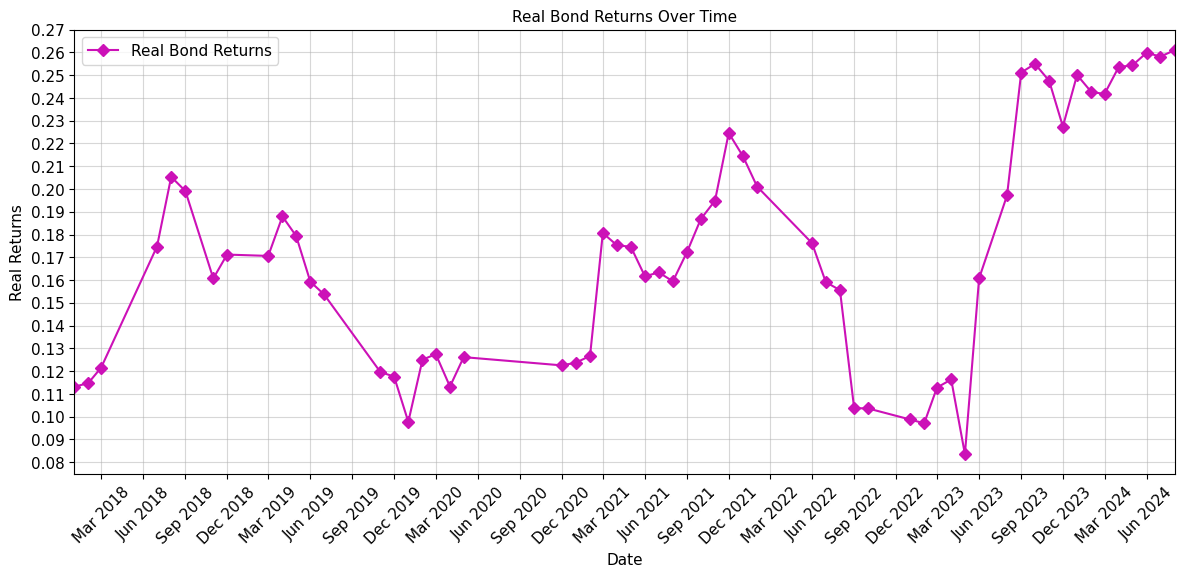

In [22]:
locator = mdates.MonthLocator(interval=3)
formatter = mdates.DateFormatter('%b %Y')

plt.figure(figsize=(12, 6))
plt.plot(
    df_gov_bond['Date'],
    df_gov_bond['real_return_bond'],
    marker='D',
    color='#CC11B7', 
    label='Real Bond Returns'
)

min_price = df_gov_bond['real_return_bond'].min()
max_price = df_gov_bond['real_return_bond'].max()
y_tick_step = 0.01
y_ticks = np.arange(
    np.floor(min_price / y_tick_step) * y_tick_step,
    np.ceil(max_price / y_tick_step) * y_tick_step + y_tick_step,
    y_tick_step
)

plt.title('Real Bond Returns Over Time', fontsize=11)
plt.xlabel('Date', fontsize=11)
plt.ylabel('Real Returns', fontsize=11)
plt.yticks(y_ticks, fontsize=11)
plt.xticks(rotation=45, fontsize=11)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.xlim([df_gov_bond['Date'].min(), df_gov_bond['Date'].max()])

plt.grid(True, alpha=0.5)
plt.legend(fontsize=11, loc='upper left')
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

## VISUALS FOR HPI:

In [24]:
df_hpi = pd.read_sql_query("SELECT * from HPI", conn)
df_hpi

,Date,TP KFE TR,TP KFE TR-1,TP KFE TR-3,hpi_return_mo,hpi_return_pa,real_return_hpi
0,2024-08,146.50,3.658105,34.440672,0.036581,0.539002,0.531482
1,2024-07,141.33,0.928372,38.735643,0.009284,0.117273,0.111542
2,2024-06,140.03,1.544598,46.383023,0.015446,0.201937,0.194742
3,2024-05,137.90,3.918613,51.338894,0.039186,0.586062,0.574816
4,2024-04,132.70,0.920222,51.570531,0.009202,0.116191,0.107884
...,...,...,...,...,...,...,...
75,2018-05,11.13,1.829826,8.691406,0.018298,0.243083,0.241270
76,2018-04,10.93,0.644567,7.367387,0.006446,0.080150,0.078786
77,2018-03,10.86,1.023256,7.845084,0.010233,0.129942,0.128561
78,2018-02,10.75,0.655431,7.931727,0.006554,0.081550,0.080314


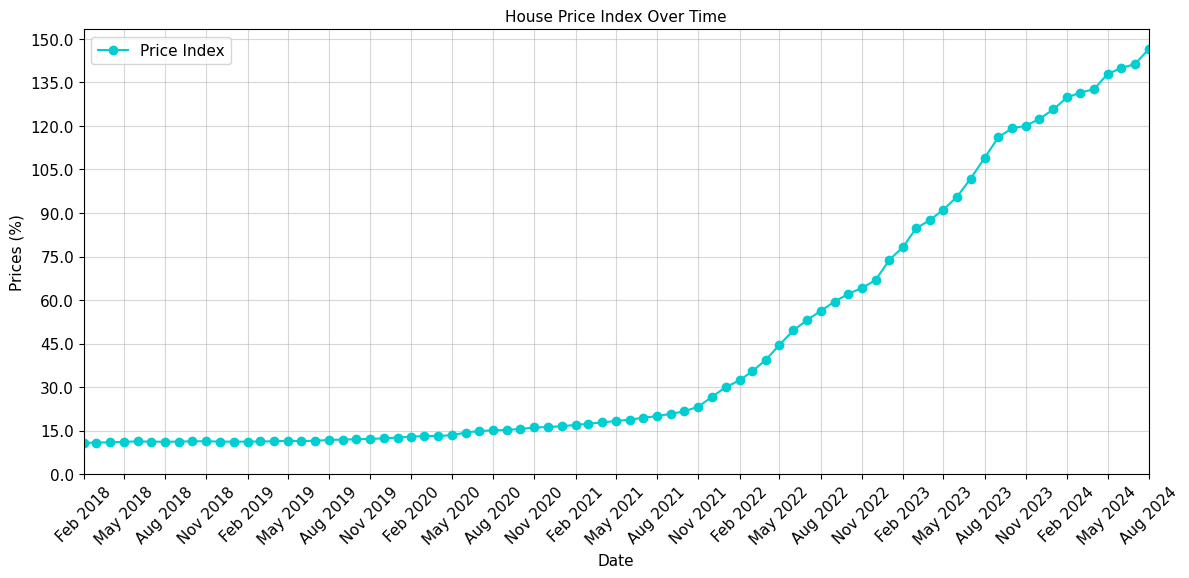

In [45]:
required_dates = pd.to_datetime(['2018-02', '2024-08'], format='%Y-%m')
df_hpi['Date'] = pd.to_datetime(df_hpi['Date'], format='%Y-%m', errors='coerce')

for date in required_dates:
    if date not in df_hpi['Date'].values:
        df_hpi = pd.concat(
            [df_hpi, pd.DataFrame({'Date': [date], 'House Prince Index': [np.nan]})],
            ignore_index=True
        )

df_gov_bond = df_gov_bond.sort_values(by='Date').reset_index(drop=True)

min_price = df_hpi['TP KFE TR'].min()
max_price = df_hpi['TP KFE TR'].max()

y_tick_step = 15
y_ticks = np.arange(
    np.floor(min_price / y_tick_step) * y_tick_step,
    np.ceil(max_price / y_tick_step) * y_tick_step + y_tick_step,
    y_tick_step
)

plt.figure(figsize=(12, 6))
plt.plot(
    df_hpi['Date'],
    df_hpi['TP KFE TR'],
    marker='o',
    linestyle='-',
    color='#00CED1',
    label='Price Index'
)
plt.title('House Price Index Over Time', fontsize=11)
plt.xlabel('Date', fontsize=11)
plt.ylabel('Prices (%)', fontsize=11)
plt.yticks(y_ticks, fontsize=11)
plt.xticks(rotation=45, fontsize=11)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

locator = mdates.MonthLocator(interval=3)
formatter = mdates.DateFormatter('%b %Y')
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.xlim([pd.Timestamp('2018-02'), pd.Timestamp('2024-08')])

plt.grid(True, alpha=0.5)
plt.legend(fontsize=11, loc='upper left')
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

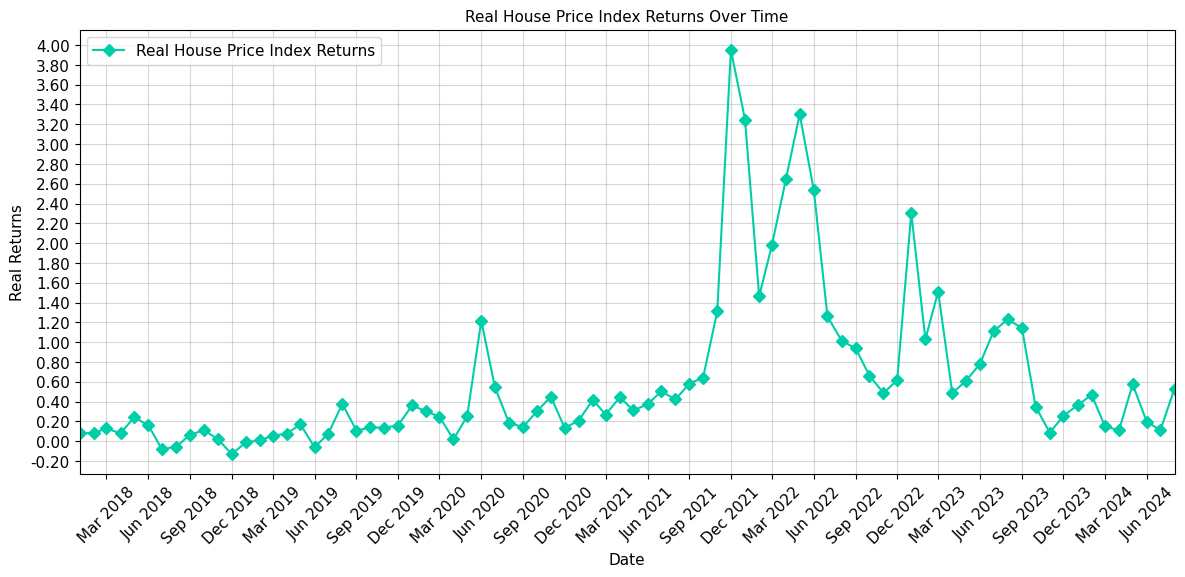

In [53]:
locator = mdates.MonthLocator(interval=3)
formatter = mdates.DateFormatter('%b %Y')

plt.figure(figsize=(12, 6))
plt.plot(
    df_hpi['Date'],
    df_hpi['real_return_hpi'],
    marker='D',
    color='#00CEA9', 
    label='Real House Price Index Returns'
)

min_price = df_hpi['real_return_hpi'].min()
max_price = df_hpi['real_return_hpi'].max()
y_tick_step = 0.20
y_ticks = np.arange(
    np.floor(min_price / y_tick_step) * y_tick_step,
    np.ceil(max_price / y_tick_step) * y_tick_step + y_tick_step,
    y_tick_step
)

plt.title('Real House Price Index Returns Over Time', fontsize=11)
plt.xlabel('Date', fontsize=11)
plt.ylabel('Real Returns', fontsize=11)
plt.yticks(y_ticks, fontsize=11)
plt.xticks(rotation=45, fontsize=11)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.xlim([df_hpi['Date'].min(), df_hpi['Date'].max()])

plt.grid(True, alpha=0.5)
plt.legend(fontsize=11, loc='upper left')
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

## VISUALS FOR BITCOIN:

In [54]:
df_btc = pd.read_sql_query("SELECT * from BTC", conn)
df_btc

,Date,Price_Bitcoin,btc_return_mo,btc_return_pa,real_return_bitcoin
0,2024-09,63785.09,0.081934,1.572833,1.560262
1,2024-08,58954.67,-0.086823,-0.663752,-0.665477
2,2024-07,64559.96,0.042888,0.655212,0.645302
3,2024-06,61904.96,-0.084658,-0.654060,-0.656513
4,2024-05,67630.41,0.129642,3.318071,3.285935
...,...,...,...,...,...
76,2018-05,7538.28,-0.187046,-0.916672,-0.916777
77,2018-04,9272.7,0.353183,36.694534,36.648452
78,2018-03,6852.51,-0.349735,-0.994284,-0.994291
79,2018-02,10538.02,0.057789,0.962400,0.960060


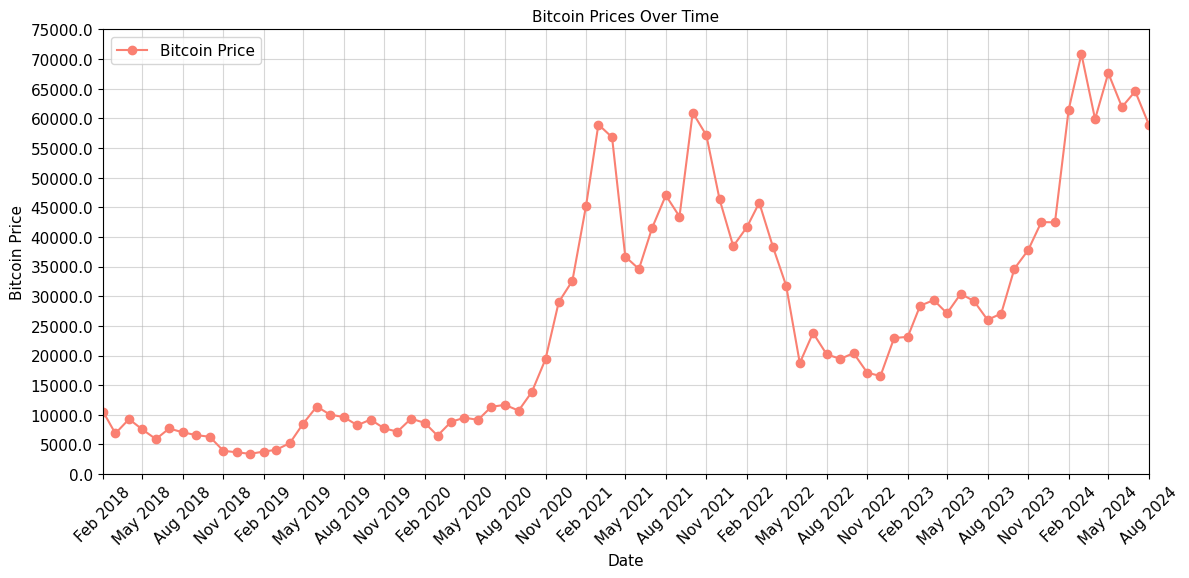

In [62]:
# Ensure 'Price_Bitcoin' is numeric
df_btc["Price_Bitcoin"] = pd.to_numeric(df_btc["Price_Bitcoin"], errors='coerce')

# Recalculate min and max
min_price = df_btc["Price_Bitcoin"].min()
max_price = df_btc["Price_Bitcoin"].max()

# Define the Y-axis ticks
y_tick_step = 5000
y_ticks = np.arange(
    np.floor(min_price / y_tick_step) * y_tick_step,
    np.ceil(max_price / y_tick_step) * y_tick_step + y_tick_step,
    y_tick_step
)

plt.figure(figsize=(12, 6))
plt.plot(
    df_btc['Date'],
    df_btc["Price_Bitcoin"],
    marker='o',
    linestyle='-',
    color='#FA8072',
    label='Bitcoin Price'
)
plt.title('Bitcoin Prices Over Time', fontsize=11)
plt.xlabel('Date', fontsize=11)
plt.ylabel('Bitcoin Price', fontsize=11)
plt.yticks(y_ticks, fontsize=11)
plt.xticks(rotation=45, fontsize=11)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

locator = mdates.MonthLocator(interval=3)
formatter = mdates.DateFormatter('%b %Y')
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.xlim([pd.Timestamp('2018-02'), pd.Timestamp('2024-08')])

plt.grid(True, alpha=0.5)
plt.legend(fontsize=11, loc='upper left')
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

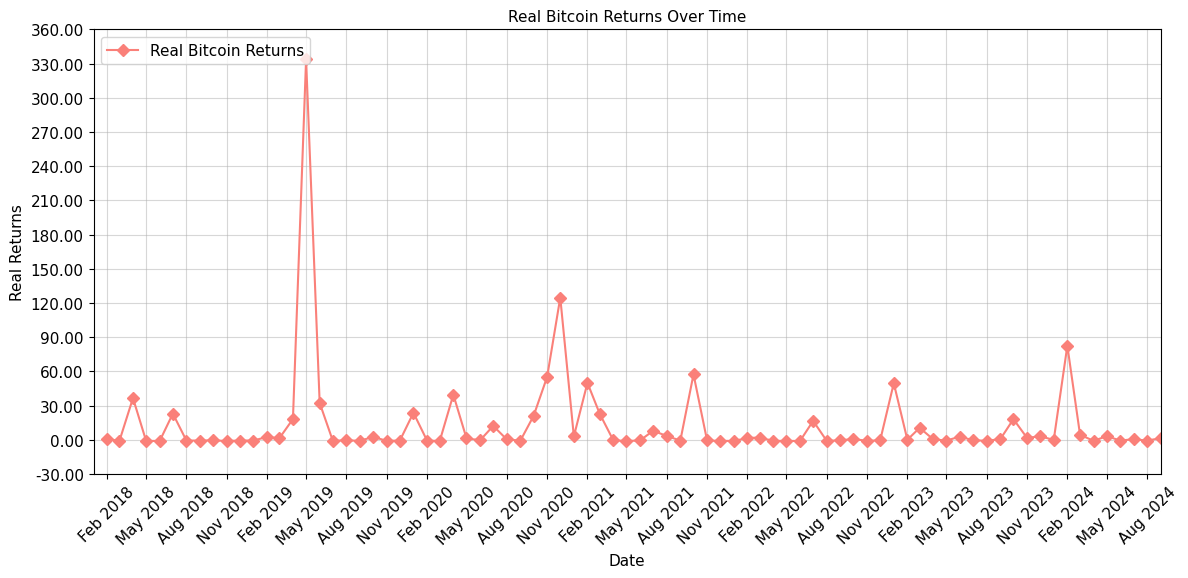

In [79]:
locator = mdates.MonthLocator(interval=3)
formatter = mdates.DateFormatter('%b %Y')

plt.figure(figsize=(12, 6))
plt.plot(
    df_btc['Date'],
    df_btc['real_return_bitcoin'],
    marker='D',
    color='#FA8079', 
    label='Real Bitcoin Returns'
)

min_price = df_btc['real_return_bitcoin'].min()
max_price = df_btc['real_return_bitcoin'].max()
y_tick_step = 30
y_ticks = np.arange(
    np.floor(min_price / y_tick_step) * y_tick_step,
    np.ceil(max_price / y_tick_step) * y_tick_step + y_tick_step,
    y_tick_step
)

plt.title('Real Bitcoin Returns Over Time', fontsize=11)
plt.xlabel('Date', fontsize=11)
plt.ylabel('Real Returns', fontsize=11)
plt.yticks(y_ticks, fontsize=11)
plt.xticks(rotation=45, fontsize=11)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.xlim([df_btc['Date'].min(), df_btc['Date'].max()])

plt.grid(True, alpha=0.5)
plt.legend(fontsize=11, loc='upper left')
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()